# Prikaz podatkov v Pythonu

In [1]:
import pandas as pd
from pathlib import Path


MAIN_PATH = Path().parent
file_path = MAIN_PATH / "stroj_02.csv"

data = pd.read_csv(file_path)
data["dc_link_voltage_avrg"] = data["dc_link_voltage_avrg"].astype(float)
data["power_actual"] = data["power_actual"].astype(float)
data["timestamp"] = pd.to_datetime(data["timestamp"], dayfirst=True)

data.head()

,timestamp,reset,RO_SALT,RO_COMBI_DISP,RO_HEATER,RO_INLET,RO_TD_FAN,RO_TD_WAX,RO_ADO,RO_TANK_VALVE_GREY,...,td_fan,turbidity_sensor,sensor_dry,prof_soft,diverter,heatpump,semi_prof,prof,main_version,bldc_version
0,2025-01-20 07:27:34,none,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,DW5060-GCU-P_MAIN_20250116_000_00_10.19.1,v20.2.4
1,2025-01-20 07:27:35,none,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,DW5060-GCU-P_MAIN_20250116_000_00_10.19.1,v20.2.4
2,2025-01-20 07:27:36,none,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,DW5060-GCU-P_MAIN_20250116_000_00_10.19.1,v20.2.4
3,2025-01-20 07:27:37,none,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,DW5060-GCU-P_MAIN_20250116_000_00_10.19.1,v20.2.4
4,2025-01-20 07:27:38,none,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,DW5060-GCU-P_MAIN_20250116_000_00_10.19.1,v20.2.4


- Matplotlib (Seaborn)
- Bokeh, Plotly (web base)

## Matplotlib

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

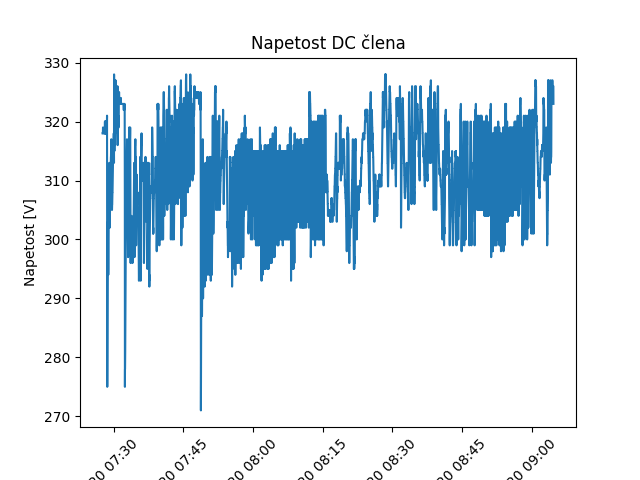

In [3]:
plt.plot(data["timestamp"], data["dc_link_voltage_avrg"])
plt.xticks(rotation=45)
plt.xlabel("Čas")
plt.ylabel("Napetost [V]")
plt.title("Napetost DC člena")
plt.show()

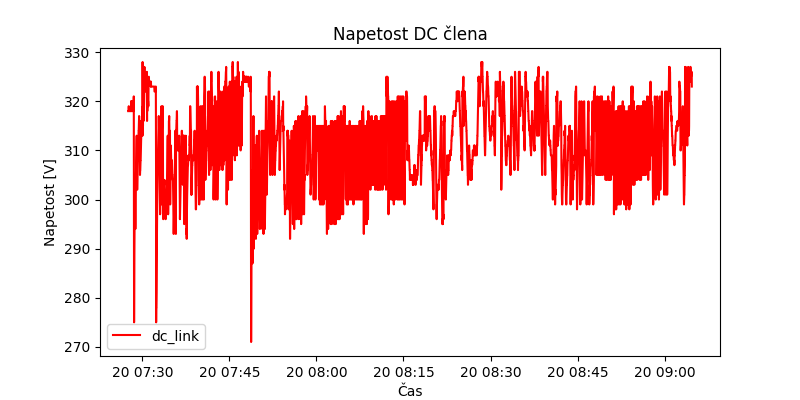

In [16]:
def onclick(event):
    if event.inaxes in [ax1]:
        ax = event.inaxes
        y = event.ydata
        x = event.xdata
        # Add horizontal line
        ax.axhline(y=y, color='green', linestyle='--', alpha=0.7)
        ax.axvline(x=x, color='yellow', linestyle='--', alpha=0.7)
        # Add text annotation at left edge
        ax.text(ax.get_xlim()[0], y, f'{y:.2f}', color='green', va='center', ha='right', backgroundcolor='white')
        fig.canvas.draw()


fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data["timestamp"], data["dc_link_voltage_avrg"], c="red", label="dc_link")
#ax1.plot(data["timestamp"], data["power_actual"], c="blue", label="power")
ax1.set_xlabel("Čas")
ax1.set_ylabel("Napetost [V]")
ax1.set_title("Napetost DC člena")
ax1.legend()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


